In [1]:
#load dataset 1
import scipy.io as si
import numpy as np

#load data from ex6data1.mat file
File = si.loadmat('ex6data1.mat')

#splitting the data in two groups positvie and negative
pos = np.array(File['X'][np.where(File['y'] == 1)[0]])
neg = np.array(File['X'][np.where(File['y'] == 0)[0]])


#make feature matrix X and result( result is a 1d array)
X = np.array(File['X'])
y = np.array(File['y']).flatten()

In [2]:
#visualize dataset 1
import matplotlib.pyplot as plt

plt.plot(pos[:,0],pos[:,1],'k+',label = 'positive')
plt.plot(neg[:,0],neg[:,1],'yo',label = 'negative')
plt.legend()
plt.show()

In [3]:
#Train our model using Linear Kernel
from sklearn import svm
model = svm.SVC(C = 100 ,kernel = 'linear', tol = 1e-3)

#fit our feature matrix and result in our Linear Kernel Model
model.fit(X,y)
print(model.coef_ , model.intercept_)

[[  4.68150544  13.08944402]] [-53.13044783]


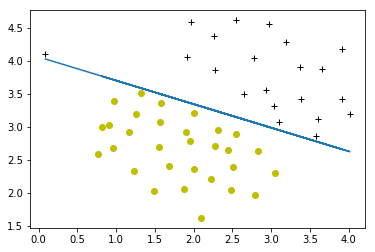

In [4]:
#visualize Decision Boundary

#plot the data
plt.plot(pos[:,0],pos[:,1],'k+',label = 'positive')
plt.plot(neg[:,0],neg[:,1],'yo',label = 'negative')

x3 = list()
for i in range(len(X)):
    x3.append(float(-(model.coef_.flatten()[0]*X[i].item(0) + model.intercept_)/model.coef_.flatten()[1]))
    
plt.plot( X[:,0].reshape(len(X),1), x3)

plt.show()

In [5]:
#implement Gaussian Kernel
def Gaussian_Kernel(x1 , x2 , sigma):
    return np.exp(-(np.sum((x1 - x2)*(x1 - x2)))/(2*sigma*sigma))


x1 = np.array([1,2,1])
x2 = np.array([0,4,-1])
sigma = 2

print("Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = " , Gaussian_Kernel(x1 , x2 , sigma))

Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma =  0.324652467358


In [6]:
#plot dataset 2

#load data from ex6data2.mat file
File1 = si.loadmat('ex6data2.mat')

#splitting the data in two groups positvie and negative
pos1 = np.array(File1['X'][np.where(File1['y'] == 1)[0]])
neg1 = np.array(File1['X'][np.where(File1['y'] == 0)[0]])


#make feature matrix X1 and result( result is a 1d array)
X1 = np.array(File1['X'])
y1 = np.array(File1['y']).flatten()

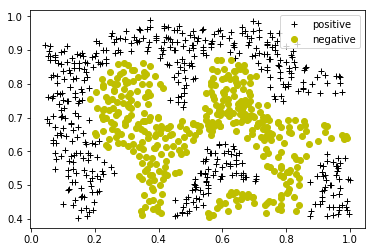

In [7]:
#visualize dataset 2
import matplotlib.pyplot as plt

plt.plot(pos1[:,0],pos1[:,1],'k+',label = 'positive')
plt.plot(neg1[:,0],neg1[:,1],'yo',label = 'negative')
plt.legend()
plt.show()

In [8]:
#Train our model using Gaussian Kernel
from sklearn import svm

def Gram_Matrix(X1,X2,sigma):
    
    gram_matrix = np.zeros((X1.shape[0],X2.shape[0]))
    
    for i , x1 in enumerate(X1):
        for j , x2 in enumerate(X2):
            
            gram_matrix[i,j] = Gaussian_Kernel(x1.flatten() , x2.flatten() , sigma)
    return gram_matrix

sigma = 0.1
model2 = svm.SVC(C = 1, kernel="precomputed")
model2.fit(Gram_Matrix(X1,X1,sigma) , y1)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto',
  kernel='precomputed', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

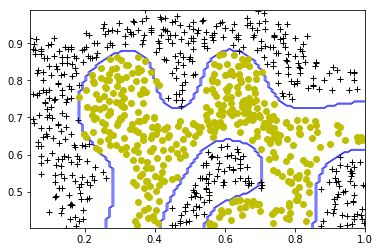

In [9]:
#visualize the boundary


plt.plot(pos1[:,0],pos1[:,1],'k+',label = 'positive')
plt.plot(neg1[:,0],neg1[:,1],'yo',label = 'negative')


x1plot = np.linspace(X1[:,0].min(), X1[:,0].max(), 100)
x2plot = np.linspace(X1[:,1].min(), X1[:,1].max(), 100)

t1, t2 = np.meshgrid(x1plot, x2plot)

vals = np.zeros((t1.shape[0] , t2.shape[0]))

for i in range(len(t1)):
    temp =  np.concatenate((t1[:,i].reshape(len(t1),1),t2[:,i].reshape(len(t2),1)),axis = 1)
    vals[:, i] = model2.predict(Gram_Matrix(temp,X1,sigma))


plt.contour(t1,t2,vals,colors = 'b',linewidths = .3)
plt.show()

In [10]:
#load dataset 3
import scipy.io as si
import numpy as np

#load data from ex6data1.mat file
File3 = si.loadmat('ex6data3.mat')

#splitting the data in two groups positvie and negative
pos3 = np.array(File3['X'][np.where(File3['y'] == 1)[0]])
neg3 = np.array(File3['X'][np.where(File3['y'] == 0)[0]])


#make feature matrix X and result( result is a 1d array)
X3 = np.array(File3['X'])
y3 = np.array(File3['y']).flatten()

#Make Feature Matrix for Cross-Validation Set
Xval = File3['Xval']
yval = File3['yval']

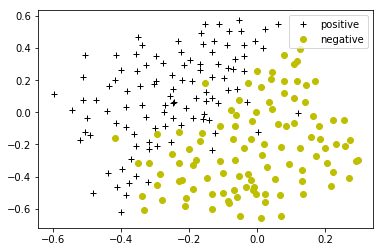

In [11]:
#visualize dataset 3
import matplotlib.pyplot as plt

plt.plot(pos3[:,0],pos3[:,1],'k+',label = 'positive')
plt.plot(neg3[:,0],neg3[:,1],'yo',label = 'negative')
plt.legend()
plt.show()

In [61]:
from sklearn import metrics #to calculate accuracy

#select best parameters
sug_C = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])
sug_sigma = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])
Accuracy = list()

def best_param(sug_C,sug_Sigma,Xval,yval,X,y):
    
    for C in sug_C:
        for sigma in sug_Sigma:
            
            #train and fit the model on given training set
            model3 = svm.SVC(C, kernel="precomputed")
            model3.fit(Gram_Matrix(X,X,sigma) , y)
            
            #compute accuracy on cross-validation set
            predict_val = model3.predict(Gram_Matrix(Xval,X,sigma))
            Accuracy.append(float(metrics.accuracy_score(yval,predict_val)))
    
    highest_accuracy = np.argmax(Accuracy)
    best_C = sug_C[highest_accuracy//len(sug_C)]
    best_sigma = sug_sigma[highest_accuracy%len(sug_C)]
    
    return best_C , best_sigma

   

In [62]:
best_C , best_sigma = best_param(sug_C,sug_sigma,Xval,yval,X3,y3)
print(best_C , best_sigma)

1.0 0.1


In [65]:
Accuracy

[0.435,
 0.435,
 0.435,
 0.435,
 0.435,
 0.435,
 0.435,
 0.435,
 0.435,
 0.435,
 0.45,
 0.86,
 0.62,
 0.435,
 0.435,
 0.435,
 0.435,
 0.435,
 0.945,
 0.91,
 0.825,
 0.435,
 0.435,
 0.435,
 0.435,
 0.755,
 0.96,
 0.925,
 0.89,
 0.74,
 0.435,
 0.435,
 0.605,
 0.905,
 0.965,
 0.965,
 0.925,
 0.845,
 0.435,
 0.435,
 0.62,
 0.89,
 0.965,
 0.945,
 0.93,
 0.89,
 0.72,
 0.435,
 0.62,
 0.89,
 0.94,
 0.955,
 0.935,
 0.92,
 0.845,
 0.435,
 0.62,
 0.89,
 0.94,
 0.96,
 0.925,
 0.925,
 0.89,
 0.74]

In [63]:
#TRAIN MODEL USING BEST C and BEST SIGMA
model3 =  svm.SVC(best_C, kernel="precomputed")
model3.fit(Gram_Matrix(X3,X3,best_sigma) , y3)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto',
  kernel='precomputed', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

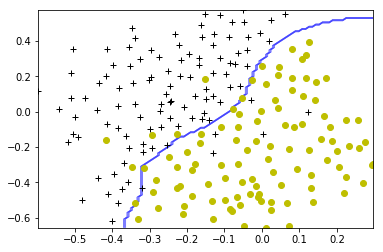

In [64]:
#Visualize Decision Boundary for Dataset 3

plt.plot(pos3[:,0],pos3[:,1],'k+',label = 'positive')
plt.plot(neg3[:,0],neg3[:,1],'yo',label = 'negative')

x1plot3 = np.linspace(X3[:,0].min(), X3[:,0].max(), 100)
x2plot3 = np.linspace(X3[:,1].min(), X3[:,1].max(), 100)

t1_3, t2_3 = np.meshgrid(x1plot3, x2plot3)

vals_3 = np.zeros((t1_3.shape[0] , t2_3.shape[0]))

for i in range(len(t1_3)):
    temp =  np.concatenate((t1_3[:,i].reshape(len(t1_3),1),t2_3[:,i].reshape(len(t2_3),1)),axis = 1)
    vals_3[:, i] = model3.predict(Gram_Matrix(temp,X3,best_sigma))


plt.contour(t1_3,t2_3,vals_3,colors = 'b',linewidths = .3)
plt.show()